In [4]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import cartopy.crs as ccrs

In [24]:
variables = {"msl": "/home/egauillard/data/MSLP_era5_NHExt_1degr_19400101_20240229_new.nc",
            'stream': "/home/egauillard/data/STREAM250_era5_NHExt_1degr_19400101_20240229_new.nc",
            "t2m": '/home/egauillard/data/T2M_era5_MED_1degr_19400101-20240229.nc',
            "sst": '/home/egauillard/data/SST_era5_NHExt_1degr_19400101-20240229_new.nc',
             "ttr": "/home/egauillard/data/OLR_era5_tropics_1degr_19400101_20240229.nc"}

In [42]:
# Ouvrir le fichier et sélectionner la date
tp_path = "/home/egauillard/data/PR_era5_MED_1degr_19400101_20240229_new.nc"
ds = xr.open_dataset(tp_path)
ds
#show same figure but for ds
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ds['tp'].sel(time='2008-01-01').plot(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines()
plt.show()


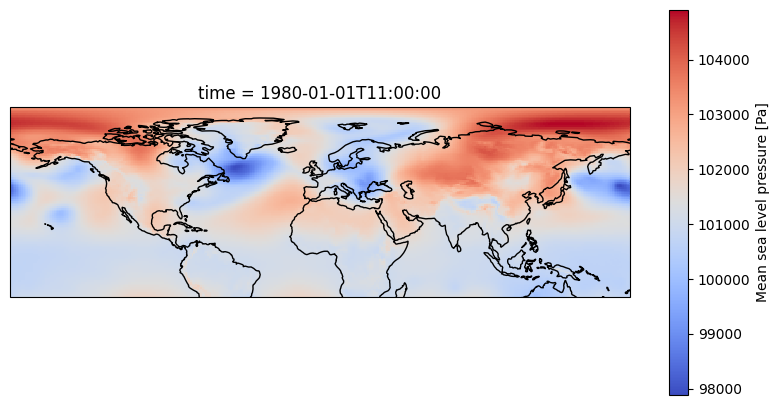

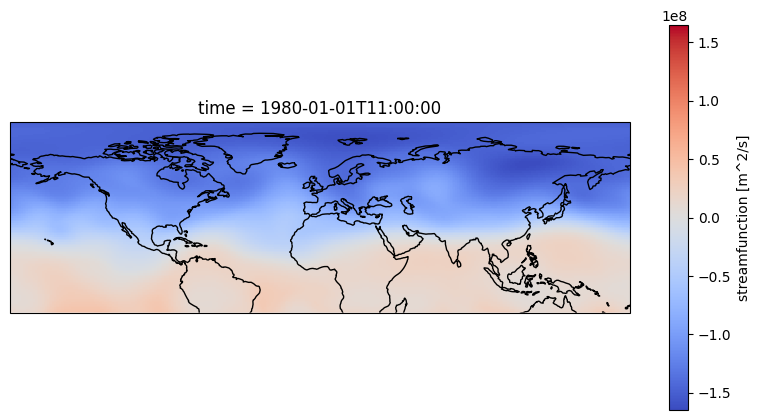

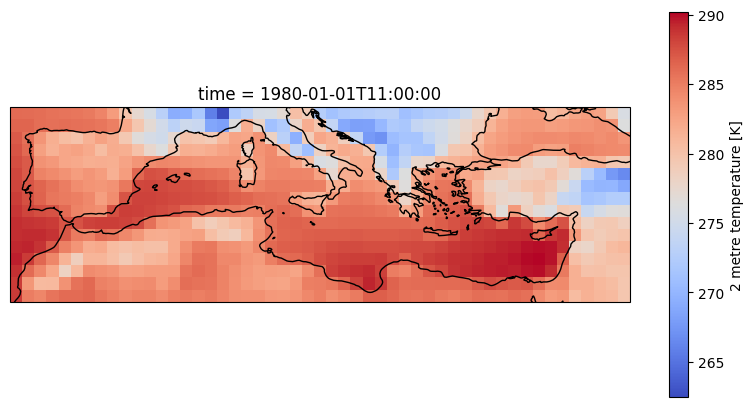

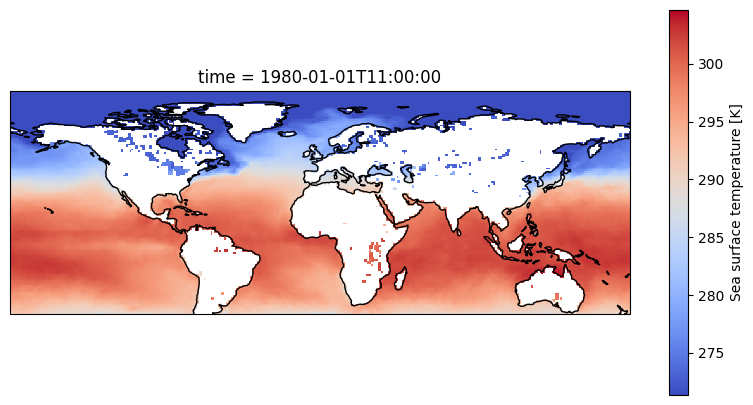

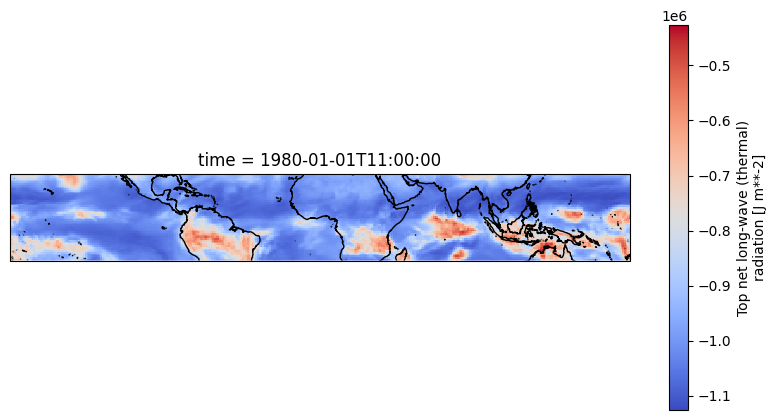

In [47]:
# pour toutes les vaiables choisir une date et montrer avec cartopu faire une fonction qui ouvre la base de données,
# selectionne la variable et la date et fait le plot

def plot_map(variable, date, cmap='viridis'):
    ds = xr.open_dataset(variables[variable])
    data = ds[variable].sel(time=date)
    fig = plt.figure(figsize=(10, 5))
    ax = plt.axes(projection=ccrs.PlateCarree())
    data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=cmap)
    # no title
    #plt.title(variable)
    ax.coastlines()
    plt.show()

for variable in variables:
    plot_map(variable, '1980-01-01', cmap='coolwarm')


<xarray.Dataset> Size: 74kB
Dimensions:    (time: 1, bnds: 2, longitude: 360, latitude: 50)
Coordinates:
  * time       (time) datetime64[ns] 8B 2000-01-01T11:00:00
  * longitude  (longitude) float32 1kB -180.0 -179.0 -178.0 ... 178.0 179.0
  * latitude   (latitude) float32 200B 30.0 29.0 28.0 27.0 ... -17.0 -18.0 -19.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 16B ...
    ttr        (time, latitude, longitude) float32 72kB ...
Attributes:
    CDI:          Climate Data Interface version 1.9.10 (https://mpimet.mpg.d...
    Conventions:  CF-1.6
    history:      Mon Jun 17 12:05:15 2024: cdo remapcon,grid_1.txt OLR_era5_...
    frequency:    day
    CDO:          Climate Data Operators version 1.9.10 (https://mpimet.mpg.d...


Text(0.5, 1.0, 'OLR for date 2000-01-01')

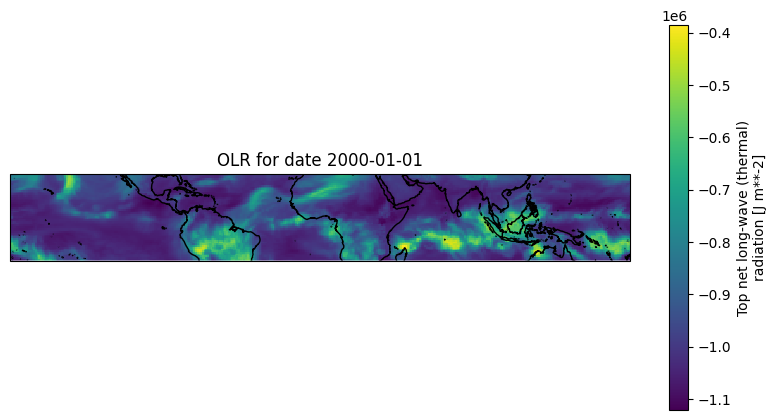

In [10]:
orl_path = "/home/egauillard/data/OLR_era5_tropics_1degr_19400101_20240229.nc"

data = xr.open_dataset(orl_path)

# choose a date random
date = "2000-01-01"
data = data.sel(time=date)

print(data)

# plot with cartopy

fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
data["ttr"].plot(ax=ax, transform=ccrs.PlateCarree(), cmap = "viridis")
ax.coastlines()
plt.title("OLR for date {}".format(date))

<xarray.Dataset> Size: 189kB
Dimensions:    (time: 1, bnds: 2, longitude: 360, latitude: 130)
Coordinates:
  * time       (time) datetime64[ns] 8B 2000-01-01T11:00:00
  * longitude  (longitude) float32 1kB -180.0 -179.0 -178.0 ... 178.0 179.0
  * latitude   (latitude) float32 520B 90.0 89.0 88.0 87.0 ... -37.0 -38.0 -39.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 16B ...
    sst        (time, latitude, longitude) float32 187kB ...
Attributes:
    CDI:          Climate Data Interface version 1.9.10 (https://mpimet.mpg.d...
    Conventions:  CF-1.6
    history:      Tue Jul 02 08:51:51 2024: cdo -b F32 cat SST_era5_NHExt_1de...
    frequency:    day
    CDO:          Climate Data Operators version 1.9.10 (https://mpimet.mpg.d...


Text(0.5, 1.0, 'SST for date 2000-01-01')

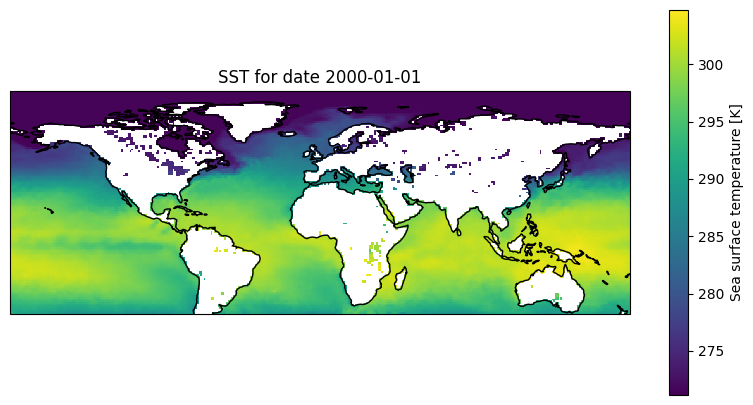

In [12]:
sst_path = "/home/egauillard/data/SST_era5_NHExt_1degr_19400101-20240229_new.nc"

sst= xr.open_dataset(sst_path)

# choose a date random
date = "2000-01-01"
sst = sst.sel(time=date)

print(sst)

# plot with cartopy

fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
sst["sst"].plot(ax=ax, transform=ccrs.PlateCarree(), cmap = "viridis")
ax.coastlines()
plt.title("SST for date {}".format(date))

In [ ]:
#open dataset
data = xr.open_dataset(orl_path)


## Data checking


In [ ]:
DATA_DIR = "/scistor/ivm/data_catalogue/reanalysis/ERA5_0.25/"

In [ ]:
sst = "SST/SST_era5_NHExt_1degr_19400101-20240229.nc"
pr = "PR/PR_era5_MED_1degr_19400101_20240229_new.nc"
mslp = "MSLP/MSLP_era5_Global_1degr_19400101_20240229.nc"
stream1 = "STREAM/500hPa/STREAM500_era5_Global_1degr_19400101_20240229.nc"
stream2 = "STREAM/250hPa/STREAM250_era5_Global_1degr_19400101_20240229.nc"
t2m = "T2M/T2M_era5_Global_0.25degr_19400101-20240229.nc"
olr = ""

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt

# Create a function that loads the data from data_path and plots the spatial mean, over time
def plot_spatial_mean(data_path, var_name, title):
    # Open the dataset from the given path
    data = xr.open_dataset(data_path)
    
    # Resample the data to monthly means, maintaining the year distinction
    monthly_mean = data[var_name].groupby("time.year").mean(dim="time")
    
    # Calculate the spatial mean (mean over latitude and longitude)
    spatial_mean = monthly_mean.mean(dim=["latitude", "longitude"])
    
    # Plot the spatial mean over time
    spatial_mean.plot()
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel(f"Mean {var_name}")
    plt.show()

def plot_month_mean(data_path, var_name, title):
    # Open the dataset from the given path
    data = xr.open_dataset(data_path)
    
    # Resample the data to monthly means, maintaining the year distinction
    monthly_mean = data[var_name].resample(time="M").mean(dim="time")
    
    # Calculate the spatial mean (mean over latitude and longitude)
    spatial_mean = monthly_mean.mean(dim=["latitude", "longitude"])
    
    # Plot the spatial mean over time
    spatial_mean.plot()
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel(f"Mean {var_name}")
    plt.show()



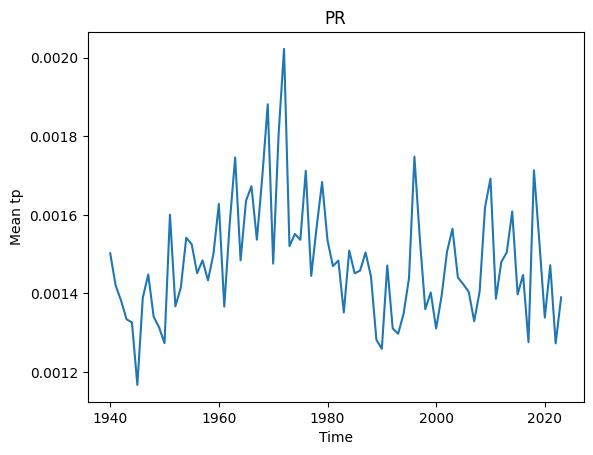

/scistor/ivm/shn051/.venv/lib64/python3.11/site-packages/xarray/core/groupby.py:668: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(


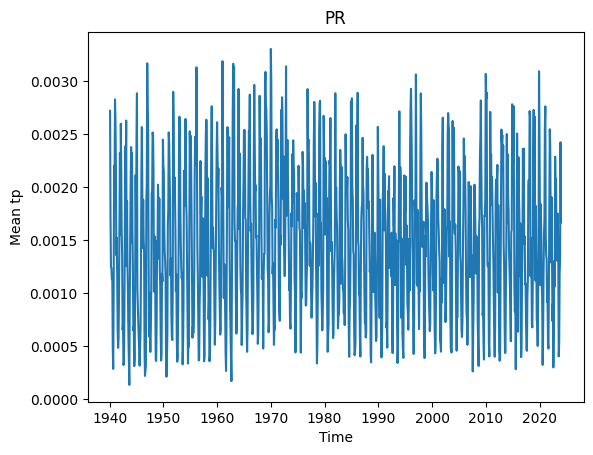

Text(0.5, 1.0, 'PR')

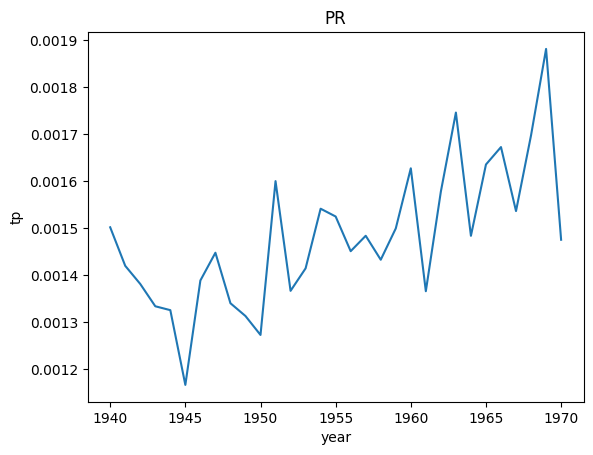

In [ ]:
plot_spatial_mean(DATA_DIR + pr, "tp", "PR")
plot_month_mean(DATA_DIR + pr, "tp", "PR")
data = xr.open_dataset(DATA_DIR + pr)
# plot juste les années entre 1940 et 1950
data["tp"].sel(time = slice("1940", "1970")).groupby("time.year").mean(dim="time").mean(dim = ["latitude", "longitude"]).plot()
plt.title("PR")

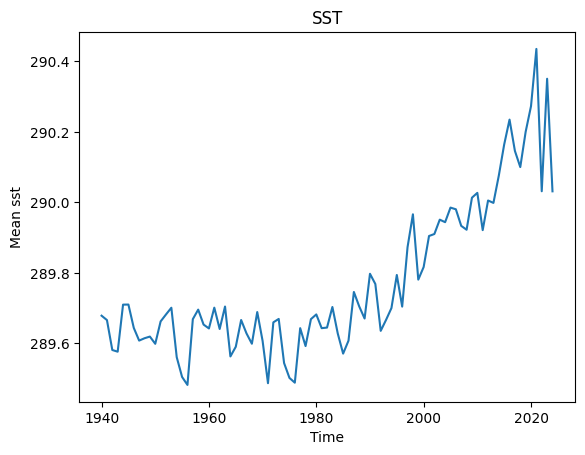

/scistor/ivm/shn051/.venv/lib64/python3.11/site-packages/xarray/core/groupby.py:668: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(


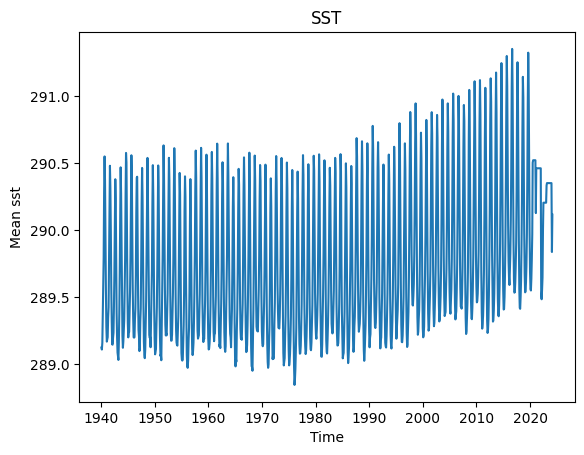

Text(0.5, 1.0, 'SST')

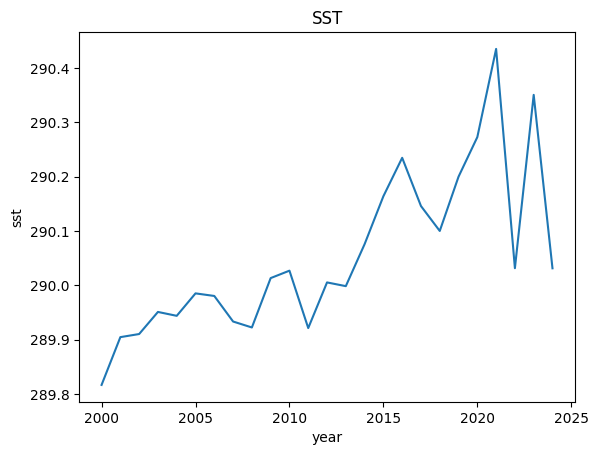

In [ ]:
plot_spatial_mean(DATA_DIR + sst, "sst", "SST")
plot_month_mean(DATA_DIR + sst, "sst", "SST")
data = xr.open_dataset(DATA_DIR + sst)
# plot juste les années entre 1940 et 1950
data["sst"].sel(time = slice("2000", "2024")).groupby("time.year").mean(dim="time").mean(dim = ["latitude", "longitude"]).plot()
plt.title("SST")

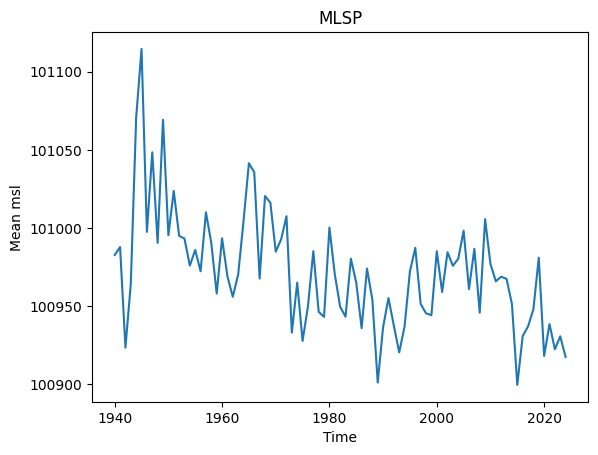

/scistor/ivm/shn051/.venv/lib64/python3.11/site-packages/xarray/core/groupby.py:668: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(


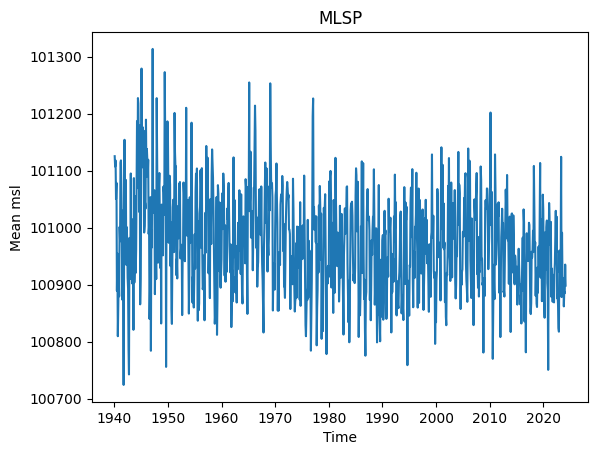

In [ ]:
plot_spatial_mean(DATA_DIR + mslp, "msl", "MLSP")
plot_month_mean(DATA_DIR + mslp, "msl", "MLSP")

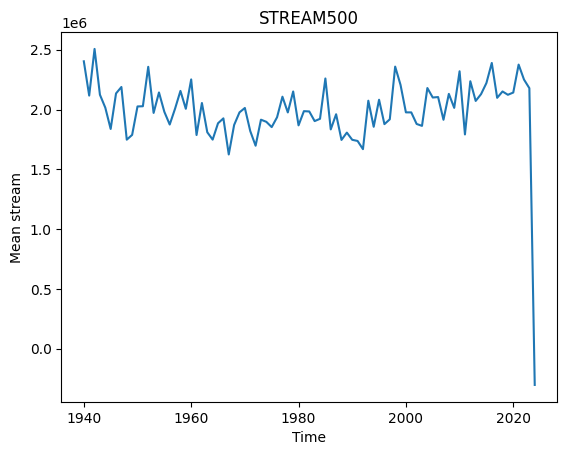

/scistor/ivm/shn051/.venv/lib64/python3.11/site-packages/xarray/core/groupby.py:668: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(


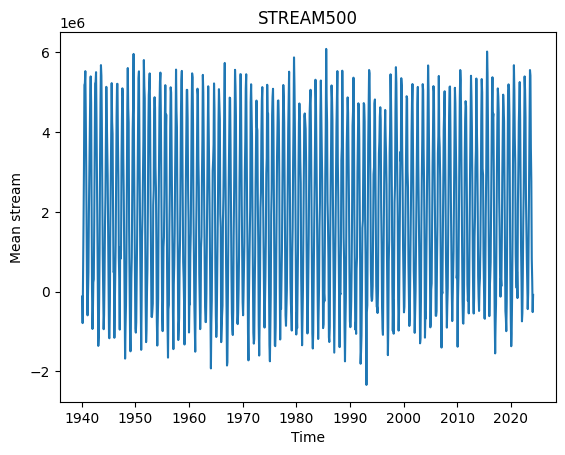

In [ ]:
plot_spatial_mean(DATA_DIR + stream1, "stream", "STREAM500")
plot_month_mean(DATA_DIR + stream1, "stream", "STREAM500")

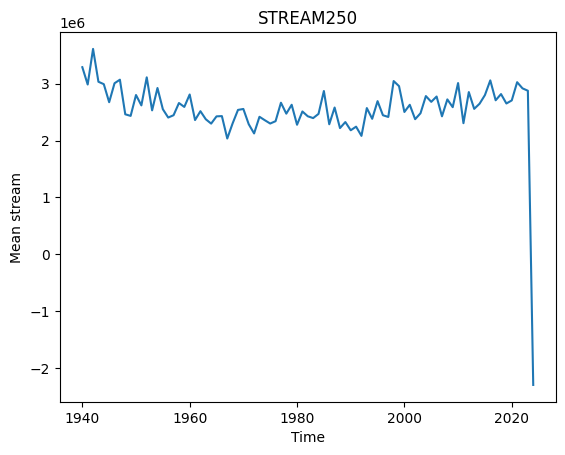

/scistor/ivm/shn051/.venv/lib64/python3.11/site-packages/xarray/core/groupby.py:668: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(


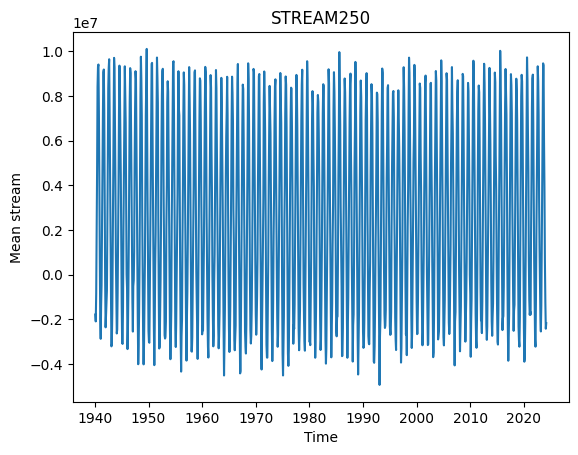

Text(0.5, 1.0, 'Stream')

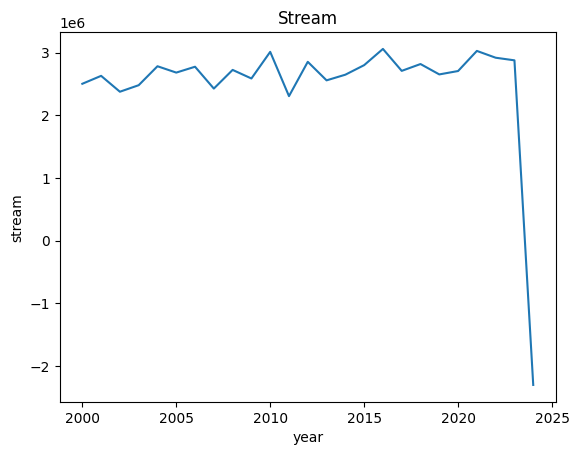

In [ ]:
plot_spatial_mean(DATA_DIR + stream2, "stream", "STREAM250")
plot_month_mean(DATA_DIR + stream2, "stream", "STREAM250")
data = xr.open_dataset(DATA_DIR + stream2)
# plot juste les années entre 1940 et 1950
data["stream"].sel(time = slice("2000", "2024")).groupby("time.year").mean(dim="time").mean(dim = ["latitude", "longitude"]).plot()
plt.title("Stream")

Text(0.5, 1.0, 'Stream')

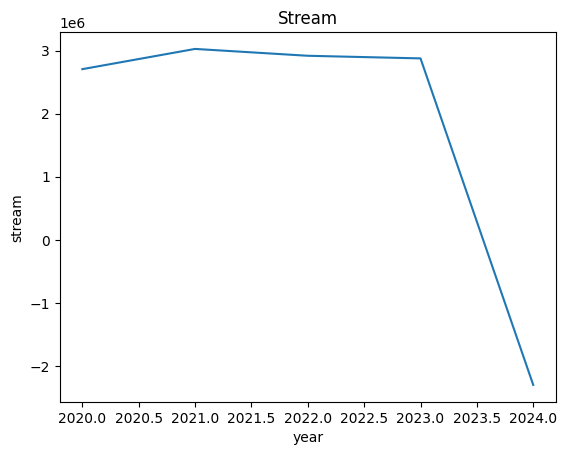

In [ ]:
data = xr.open_dataset(DATA_DIR + stream2)
# plot juste les années entre 1940 et 1950
data["stream"].sel(time = slice("2020", "2024")).groupby("time.year").mean(dim="time").mean(dim = ["latitude", "longitude"]).plot()
plt.title("Stream")

In [ ]:
plot_spatial_mean(DATA_DIR + t2m, "t2m", "T2M")
plot_month_mean(DATA_DIR + t2m, "t2m", "T2M")

KeyboardInterrupt: 

## ORL checking

In [ ]:
dataset_path = "/scistor/ivm/data_catalogue/reanalysis/ERA5_0.25/OLR/OLR_era5_tropics_1degr_19400101_20240229.nc"

In [ ]:
ds = xr.open_dataset(dataset_path)

2019
<xarray.DataArray 'ttr' (time: 365)> Size: 1kB
array([-927459.1 , -931856.  , -937985.5 , -938717.8 , -943027.9 ,
       -943256.44, -942922.8 , -941131.25, -941231.8 , -940637.6 ,
       -941725.1 , -940969.5 , -938880.44, -933520.9 , -933654.5 ,
       -935676.06, -933375.2 , -932345.9 , -929351.25, -928788.44,
       -930028.6 , -932525.4 , -934963.9 , -936141.94, -929639.2 ,
       -924884.5 , -927892.94, -932958.75, -931812.3 , -935289.25,
       -935421.8 , -934814.9 , -938209.7 , -941677.44, -941686.  ,
       -941386.7 , -948089.06, -952585.44, -949420.7 , -948491.4 ,
       -944945.4 , -946963.4 , -951618.1 , -947517.9 , -946511.5 ,
       -944696.  , -945417.2 , -948794.  , -950359.  , -948560.25,
       -947661.9 , -949273.5 , -948302.8 , -950266.56, -951024.44,
       -948683.  , -943442.8 , -944759.56, -945938.2 , -944855.06,
       -950054.25, -947255.8 , -942617.7 , -941908.6 , -939810.94,
       -939373.8 , -942983.2 , -940323.7 , -940494.9 , -943443.25,
       -94

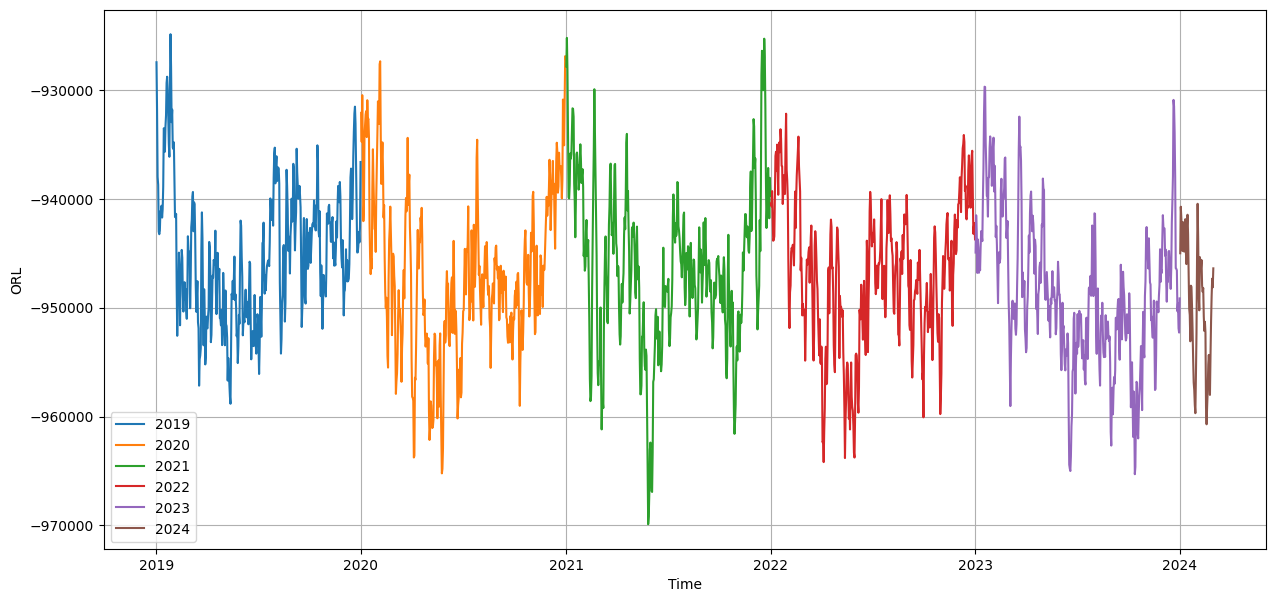

In [ ]:
import matplotlib.pyplot as plt
import xarray as xr


# Group by year
group_by_year = ds.mean(dim = ['latitude', 'longitude'])
group_by_year = group_by_year.groupby('time.year')

# Plotting the data for the years 2021, 2022, 2023, and 2024
plt.figure(figsize=(15, 7))

# Plot the daily data for each year
for year in [2019, 2020, 2021, 2022, 2023, 2024]:
    daily_data = group_by_year[year]
    print(year)
    print(daily_data['ttr'])
    # check if there is nan
    print(np.isnan(daily_data['ttr']).sum())
    plt.plot(daily_data['time'], daily_data['ttr'], label=str(year))  # Assuming 'orl' is the variable of interest

# Customize the plot
plt.xlabel('Time')
plt.ylabel('ORL')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()



In [ ]:
# Group by year
group_by_year = ds.mean(dim = ['latitude', 'longitude'])
group_by_year = group_by_year.groupby('time.year')

# Plotting the data for the years 2021, 2022, 2023, and 2024
plt.figure(figsize=(15, 7))

# Plot the daily data for each year
for year in [2019, 2020, 2021, 2022, 2023, 2024]:
    daily_data = group_by_year[year]
    print(year)
    print(daily_data['ttr'].mean())

2019
<xarray.DataArray 'ttr' ()> Size: 4B
array(-945087.94, dtype=float32)
2020
<xarray.DataArray 'ttr' ()> Size: 4B
array(-947028.3, dtype=float32)
2021
<xarray.DataArray 'ttr' ()> Size: 4B
array(-946457.9, dtype=float32)
2022
<xarray.DataArray 'ttr' ()> Size: 4B
array(-947038.06, dtype=float32)
2023
<xarray.DataArray 'ttr' ()> Size: 4B
array(-948691.6, dtype=float32)
2024
<xarray.DataArray 'ttr' ()> Size: 4B
array(-949390.2, dtype=float32)


<Figure size 1500x700 with 0 Axes>

In [ ]:
group_by_year[2024]['ttr']

<xarray.DataArray 'ttr' (time: 60)> Size: 240B
array([-945003.56, -940728.94, -941811.56, -943730.94, -944794.2 ,
       -942151.3 , -943383.25, -944850.8 , -943282.7 , -941875.6 ,
       -944779.  , -945997.6 , -942500.9 , -941465.5 , -943251.4 ,
       -946846.06, -950105.06, -950667.6 , -953089.2 , -947980.94,
       -948090.  , -949839.06, -951972.56, -954645.9 , -956875.9 ,
       -957563.  , -958943.8 , -959693.7 , -956203.44, -952327.2 ,
       -945321.06, -940460.  , -943642.6 , -948957.7 , -950244.9 ,
       -945360.2 , -945746.06, -946356.25, -945626.8 , -947976.56,
       -948546.44, -948193.94, -950808.8 , -952144.3 , -951295.3 ,
       -952289.6 , -959177.5 , -960712.7 , -959020.06, -957621.5 ,
       -955240.8 , -954343.06, -955414.6 , -958014.7 , -954362.3 ,
       -951262.1 , -948956.75, -947334.06, -948135.56, -946390.44],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 480B 2024-01-01T11:00:00 ... 2024-02-29T11...

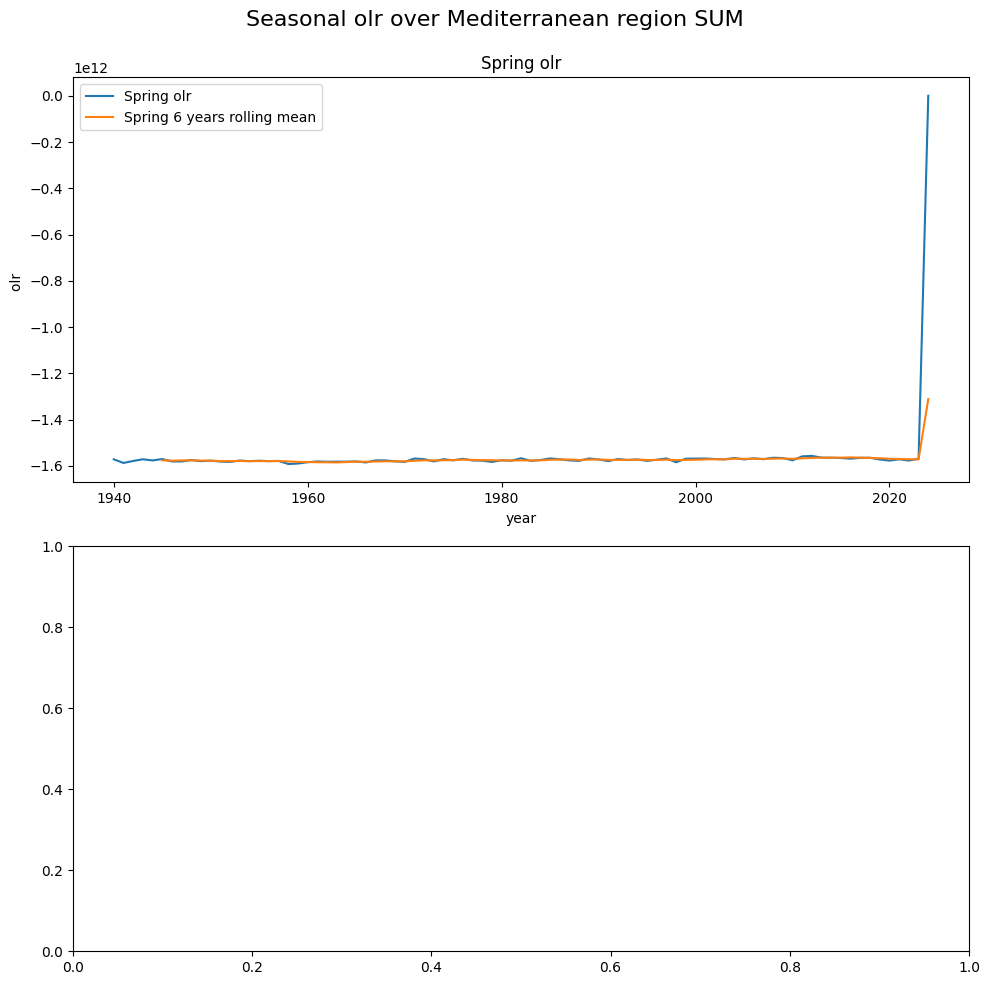

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
season_mapping = { 'MAM': 'Spring'}

for i, season in enumerate(season_mapping.keys()):
    season_mean = ds['ttr'].where(ds['time.season'] == season)
    season_mean = season_mean.groupby('time.year').sum(dim=['time', 'latitude', 'longitude'])
    rolling = season_mean.rolling(year=6).mean()
    season_mean_df = season_mean.to_dataframe().reset_index()
    
    sns.lineplot(data=season_mean_df, x='year', y='ttr', ax=ax[i], label=f'{season_mapping[season]} olr')
    sns.lineplot(data=rolling.to_dataframe().reset_index(), x='year', y='ttr', ax=ax[i], label=f'{season_mapping[season]} 6 years rolling mean')
    
    ax[i].set_title(f'{season_mapping[season]} olr')
    ax[i].set_ylabel('olr ')

# Adjust layout to make room for the suptitle
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.suptitle('Seasonal olr over Mediterranean region SUM', fontsize=16)
plt.show()